Conexión a Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Carga de librerías

In [0]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from gensim.models import KeyedVectors
import itertools
import random

In [0]:
def get_top_n_terms(term_list,n=-1):
  sel_terms=term_list[:n]
  sel_tokens=[t[1].split(' ') for t in sel_terms]
  sel_tokens =list(itertools.chain(*sel_tokens)) 
  sel_tokens=[t.lstrip("'").rstrip("'") for t in sel_tokens]
  sel_tokens=list(set(sel_tokens))
  return sel_tokens

In [0]:
def plot_terms(model, terms):
  sel_tokens=[t for t in terms if t in model.wv.vocab]
  X = model[sel_tokens]
  pca = PCA(n_components=2)
  result = pca.fit_transform(X)
  # create a scatter plot of the projection
  plt.scatter(result[:, 0], result[:, 1])
  words = list(sel_tokens)
  for i, word in enumerate(words):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

In [0]:
def compare_models(models, terms):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  for key,model in models.items():
    sel_tokens=[t for t in terms if t in model.wv.vocab]
    X = model[sel_tokens]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    color=(random.random(), random.random(), random.random())
    ax.scatter(result[:, 0], result[:, 1],c=[color],label=key)
    words = list(sel_tokens)
    for i, word in enumerate(words):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.legend(loc='upper left');
  plt.show()


#Comparar los tres modelos

In [8]:
models={}
model_path = F"/content/gdrive/My Drive/Drugs4Covid_NLP/Modelos_WordEmbedding/"+'covid.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)
models['covid']=model
model_path = F"/content/gdrive/My Drive/Drugs4Covid_NLP/Modelos_WordEmbedding/"+'dengue.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)
models['dengue']=model
model_path = F"/content/gdrive/My Drive/Drugs4Covid_NLP/Modelos_WordEmbedding/"+'malaria.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)
models['malaria']=model

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


##3kt_100kc_4d

In [0]:
freq_path = F"/content/gdrive/My Drive/Drugs4Covid_NLP/Modelos_WordEmbedding/"+"3kt_100kc_4d.txt"
freq_file=open(freq_path,'r')
terms=freq_file.read().rstrip().lstrip().split('\n')
terms=[tuple(map(str, t[1:-1].split(','))) for t in terms ]
terms=[(float(t[0]),t[1]) for t in terms]
tokens_3kt_d=get_top_n_terms(terms,20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


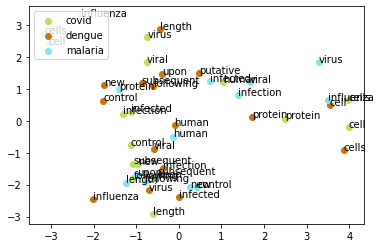

In [11]:
compare_models(models,tokens_3kt_d)

##3kt_100kc_4f

In [0]:
freq_path = F"/content/gdrive/My Drive/Drugs4Covid_NLP/Modelos_WordEmbedding/"+"3kt_100kc_4f.txt"
freq_file=open(freq_path,'r')
terms=freq_file.read().rstrip().lstrip().split('\n')
terms=[tuple(map(str, t[1:-1].split(','))) for t in terms ]
terms=[(float(t[0]),t[1]) for t in terms]
tokens_3kt_f=get_top_n_terms(terms,20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


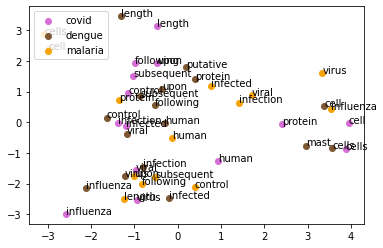

In [13]:
compare_models(models,tokens_3kt_f)

10k_freq_4-2

In [0]:
freq_path = F"/content/gdrive/My Drive/Drugs4Covid_NLP/Modelos_WordEmbedding/"+"10k_freq_4-2.txt"
freq_file=open(freq_path,'r')
terms=freq_file.read().rstrip().lstrip().split('\n')
terms=[tuple(map(str, t[1:-1].split(','))) for t in terms ]
terms=[(float(t[0]),t[1]) for t in terms]
tokens_10k=get_top_n_terms(terms,20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


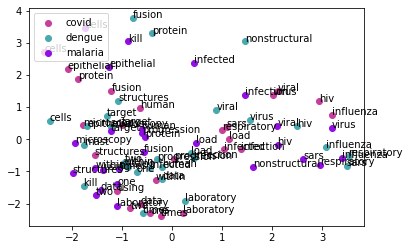

In [15]:
compare_models(models,tokens_10k)

#COVID

10k terms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


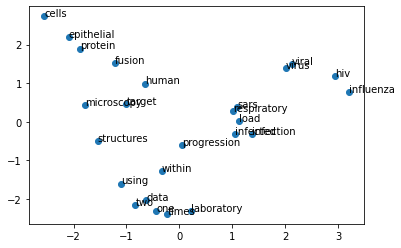

In [21]:
plot_terms(models['covid'],tokens_10k)

3k_d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


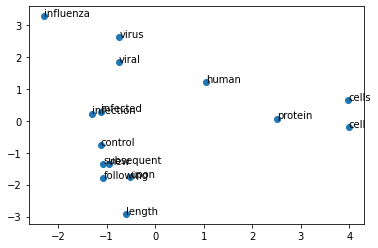

In [22]:
plot_terms(models['covid'],tokens_3kt_d)

3kt_f

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


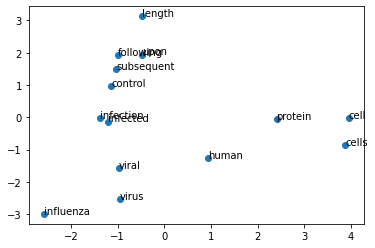

In [23]:
plot_terms(models['covid'],tokens_3kt_f)

#Malaria

10k terms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


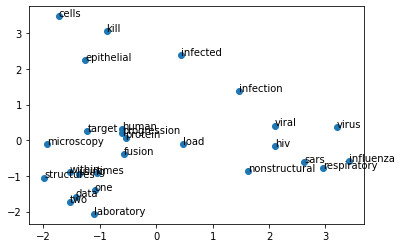

In [24]:
plot_terms(models['malaria'],tokens_10k)

3k_d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


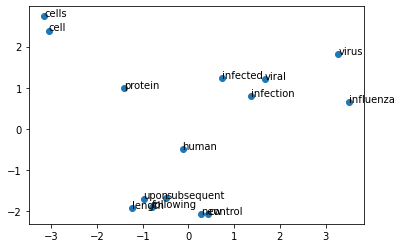

In [25]:
plot_terms(models['malaria'],tokens_3kt_d)

3kt_f

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


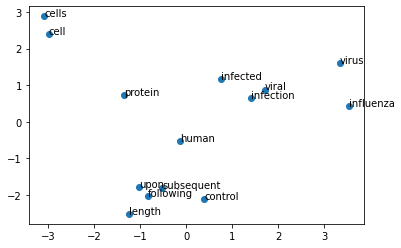

In [26]:
plot_terms(models['malaria'],tokens_3kt_f)

#Dengue



10k terms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


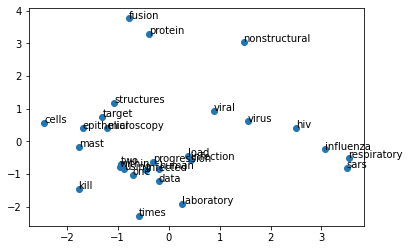

In [27]:
plot_terms(models['dengue'],tokens_10k)

3k_d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


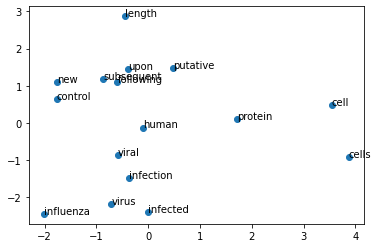

In [28]:
plot_terms(models['dengue'],tokens_3kt_d)

3kt_f

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


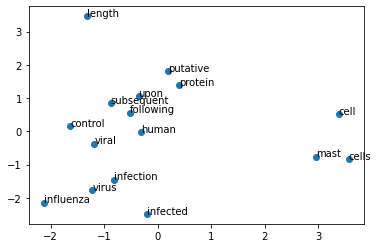

In [29]:
plot_terms(models['dengue'],tokens_3kt_f)